<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset.

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [3]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data, test_data, train_target, test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept:
 [30.28894834]

Coefficients:
 [[-1.12463481e-01]
 [ 3.00810168e-02]
 [ 4.07309919e-02]
 [ 2.78676719e+00]
 [-1.72406347e+01]
 [ 4.43248784e+00]
 [-6.23998173e-03]
 [-1.44848504e+00]
 [ 2.62113793e-01]
 [-1.06390978e-02]
 [-9.16398679e-01]
 [ 1.24516469e-02]
 [-5.09349120e-01]]

Train Error:
 84.3163281520015

Test Error:
 12.155713464846547


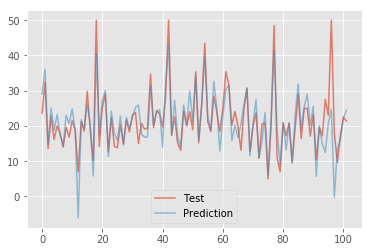

In [4]:
# Task 1-1: use linear regression in sklearn

'''
    Create a linear_model object.  Use it to fit the model, then predict based on it
'''
regress = linear_model.LinearRegression()
regress.fit(train_data, train_target)
pred_target = regress.predict(test_data)

# Task 1-2: show intercept and coefficents

'''
    Prints out the intercept as well as the coefficients
'''
print("Intercept:\n", regress.intercept_)
print("\nCoefficients:\n", regress.coef_.T)
    

# Task 1-3: show errors on training dataset and testing dataset

'''
    Calculates the mean squared error and divides by 2, then prints it out
    Training error is calculated using the first 102 elements of the training_target set
'''
train_error = mean_squared_error(train_target[0:102], pred_target) / 2
test_error = mean_squared_error(test_target, pred_target) / 2
print("\nTrain Error:\n", train_error)
print("\nTest Error:\n", test_error)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset

'''
    Creates two plots, prediction shown in blue on top of the test values in orange
'''
plt.style.use('ggplot')
plt.plot(range(0,102), test_target, alpha = 0.7)
plt.plot(range(0,102), pred_target, alpha = 0.5)
plt.legend(['Test','Prediction'])
plt.show()

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept:
 [30.28894834]

Coefficients:
 [[-1.12463481e-01]
 [ 3.00810168e-02]
 [ 4.07309919e-02]
 [ 2.78676719e+00]
 [-1.72406347e+01]
 [ 4.43248784e+00]
 [-6.23998173e-03]
 [-1.44848504e+00]
 [ 2.62113793e-01]
 [-1.06390978e-02]
 [-9.16398679e-01]
 [ 1.24516469e-02]
 [-5.09349120e-01]]

Train Error:
 84.31632815200172

Test Error:
 12.155713464846785


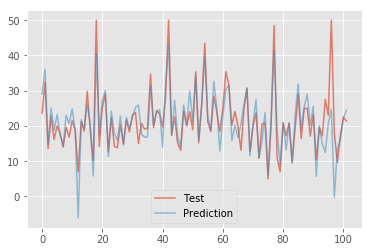

In [5]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights

'''
    Analytical regression implementation, following formula from slides
'''
def myNormalEqualFun(X,y):
    x = np.matmul(np.transpose(X), X)
    x = np.linalg.inv(x)

    t = np.matmul(np.transpose(X), y)
    
    w = np.matmul(x, t)
    
    return w
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

'''
    Prediction function, just a dot product
'''
def myPredictFun(X,w):
    p = np.dot(X, w)
    
    return p

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights

'''
    Use function to get weights which we then use to make a prediction
'''
w = myNormalEqualFun(train_data_intercept,train_target)
p = myPredictFun(test_data_intercept, w)


# Task 2-3: show intercept and coefficents

'''
    Prints out the intercept as well as the coefficients
'''
print("Intercept:\n", w[0])
print("\nCoefficients:\n", w[1:])

# Task 2-4: show errors on training dataset and testing dataset

'''
    Implementation of the error function as shown in project docs
'''
def loss(y_test, y_pred):
    diff = y_test - y_pred
    l = np.matmul(diff.T, diff)
    l = l / (2 * y_pred.size)
    
    return l

'''
    Print out of the training error using the first 102 elements of the training_target set
    followed by a print out of the testing error
'''
train_error = loss(train_target[0:102], p)
test_error = loss(test_target, p)
print("\nTrain Error:\n", train_error[0][0])
print("\nTest Error:\n", test_error[0][0])


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

'''
    Creates two plots, prediction shown in blue on top of the test values in orange
'''
plt.style.use('ggplot')
plt.plot(range(0,102), test_target, alpha = 0.7)
plt.plot(range(0,102), p, alpha = 0.5)
plt.legend(['Test','Prediction'])
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept:
 [22.79653465]

Coefficients:
 [[-0.9411749 ]
 [ 0.57522327]
 [ 0.08437861]
 [ 0.74699207]
 [-1.91897439]
 [ 3.2036048 ]
 [-0.19462863]
 [-2.98259133]
 [ 1.65502741]
 [-1.13439314]
 [-2.0060508 ]
 [ 1.13790208]
 [-3.59211138]]

Train Error:
 83.27690026318642

Test Error:
 12.375596806934164


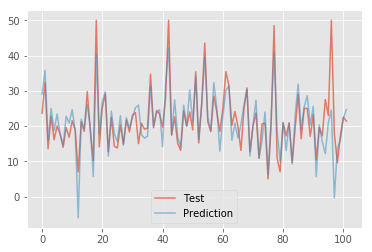

In [6]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: Weights

'''
    Gradient descent implementation, following formula from slides
'''
def myGradientDescentFun(X,y,learning_rate,numItrs):
    w = np.random.rand(X.shape[1], 1)
    
    for i in range(0, numItrs):
        diff = y - (np.dot(X, w))
        w = w + (learning_rate / y.size) * np.dot(np.transpose(X), diff)
    
    return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

'''
    Prediction function, just a dot product
'''
def myPredictFun(X,w):
    p = np.dot(X, w)
    
    return p

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations

'''
    Use function to get weights which we then use to make a prediction
'''
w = myGradientDescentFun(train_data_intercept, train_target, 0.2, 100)
p = myPredictFun(test_data_intercept, w)

# Task 3-3: show intercept and coefficents

'''
    Prints out the intercept as well as the coefficients
'''
print("Intercept:\n", w[0])
print("\nCoefficients:\n", w[1:])

# Task 3-4: show errors on training dataset and testing dataset

'''
    Print out of the training error using the first 102 elements of the training_target set
    followed by a print out of the testing error
'''
train_error = loss(train_target[0:102], p)
test_error = loss(test_target, p)
print("\nTrain Error:\n", train_error[0][0])
print("\nTest Error:\n", test_error[0][0])

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset

'''
    Creates two plots, prediction shown in blue on top of the test values in orange
'''
plt.style.use('ggplot')
plt.plot(range(0,102), test_target, alpha = 0.7)
plt.plot(range(0,102), p, alpha = 0.5)
plt.legend(['Test','Prediction'])
plt.show()
